# Quantum Computing Introduction - Assignment 7
# Names:
# IDs:

Welcome to the seventh assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).


## Python environment

The following cell contains some useful definitions and functions for the development of your assignment. They were already introduced in the Qiskit Introduction notebook and included here in case you need them.

In [1]:
# Function: obtain_vector(quantum_circuit)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation and 
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    return resulting_vector


# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation for
# a number of trials, collects the sample counts and the resulting probabilities and
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 10000):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Execute the simulation for a number of trials (10000 per deault)
    counts = resulting_vector.sample_counts(shots = trials)

    # Collect the results from the job
    probabilities = resulting_vector.probabilities()

    return resulting_vector, counts, probabilities





For this assignment you can use whatever simulator you consider useful to solve the exercises. Read carefully the questions and identify the most suitable simulator for your purposes. Moreover, you will have to setup your own [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) because we are not going to use only 2-qubit quantum system. Hence, your solution should include the complete setup process to create and simulate the requested quantum circuit.

## Question 1

During the lecture: "Basic Quantum Algorithms 1", the implementation of a quantum half-adder was presented. Implement the corresponding circuit, execute the simulation and explain why your implementation performs the correct sum.

![Question1](img/qci_a7_question1.png)

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


def create_q0_q3_circuit():
    """Create a 4-qubit circuit with qubits conceptually named Q_0..Q_3.

    Layout (indices): Q_0 = q[0], Q_1 = q[1], Q_2 = q[2], Q_3 = q[3]
    The circuit prepares two Bell-like pairs and links them with a CX.
    """
    qc = QuantumCircuit(4)

    # Prepare entanglement between Q_0 and Q_2
    qc.h(0)       # H on Q_0
    qc.h(1)       # H on Q_1
    qc.cx(0, 2)   # CNOT Q_0 -> Q_2

    qc.cx(1, 2)   # CNOT Q_1 -> Q_2 (entangles Q_1 with Q_2, which is already entangled with Q_0)
    # Prepare entanglement between Q_2 and Q_3
    
    # CNOT Q_0 -> Q_1 -> Q_3 as target
    qc.ccx(0, 1, 3)   # CNOT Q_0 -> Q_1, with Q_3 as target

    return qc


def statevector_and_counts(qc, shots: int = 1024):
    """Return the statevector and sample counts for a circuit (no measurements added)."""
    sv = Statevector(qc)
    counts = sv.sample_counts(shots=shots)
    return sv, counts


def pretty_print_demo():
    qc = create_q0_q3_circuit()
    sv, counts = statevector_and_counts(qc, shots=2048)

    print("Circuit (Q_0..Q_3):")
    print(qc.draw())
    print("\nStatevector (amplitudes):\n", sv.data)
    print("\nSampled counts (showing most frequent outcomes):")
    # show sorted counts
    for outcome, c in sorted(counts.items(), key=lambda x: -x[1])[:8]:
        print(f"{outcome}: {c}")


if __name__ == "__main__":
    pretty_print_demo()


Circuit (Q_0..Q_3):
     ┌───┐               
q_0: ┤ H ├──■─────────■──
     ├───┤  │         │  
q_1: ┤ H ├──┼────■────■──
     └───┘┌─┴─┐┌─┴─┐  │  
q_2: ─────┤ X ├┤ X ├──┼──
          └───┘└───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

Statevector (amplitudes):
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0.5+0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]

Sampled counts (showing most frequent outcomes):
0101: 520
0110: 516
0000: 513
1011: 499


## Question 2

During the lecture: "Basic Quantum Algorithms 1", it was presented the `Deutsch algorithm` with its corresponding quantum implementation. Moreover, you identified 2 possible oracle implementations for balanced (Identity and NOT) and constant (Set and Reset) functions.

Implement the following circuit (representing the Set function) and execute a single-shot simulation. Does your implementation correctly identify the function as constant?

![Question2](img/qci_a7_question2.png)

**NB:** Remember that the algorithm states that the $\ket{q_{1}}$ register must be initialized to $\ket{1}$.

In [75]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


def create_q0_q1_circuit():
    """Deutsch algorithm for the 1-bit 'Set' oracle (f(x)=1)."""
    qc = QuantumCircuit(2)  # q0 = input, q1 = ancilla/target

    # Initialize ancilla (q1) to |1> as required by the algorithm
    qc.x(1)

    # Put both qubits into Hadamard superposition
    qc.h(0)
    qc.h(1)

    # Oracle for 'Set' (constant 1): flip the target regardless of input
    qc.x(1)

    # Final Hadamard on the input qubit
    qc.h(0)

    return qc


def statevector_and_counts(qc, shots: int = 1):
    """Return the statevector and sampled counts for a circuit (no measurements in the circuit)."""
    sv = Statevector(qc)
    counts = sv.sample_counts(shots=shots)
    return sv, counts


def pretty_print_demo():
    qc = create_q0_q1_circuit()
    sv, counts = statevector_and_counts(qc, shots=1)

    print("Circuit (Q_0..Q_1):")
    print(qc.draw())
    print("\nStatevector (amplitudes):\n", sv.data)
    print("\nSampled counts (single-shot):")
    for outcome, c in counts.items():
        print(f"{outcome}: {c}")

    # Interpret the measured input qubit q0 from the sampled outcome key(s)
    outcome = next(iter(counts))
    # Treat the leftmost character as q0
    input_bit = outcome[0]
    print(f"\nMeasured input qubit q0: |{input_bit}>")
    if input_bit == '0':
        print("Result: Function identified as constant (expected).")
    else:
        print("Result: Function identified as balanced (unexpected).")

if __name__ == "__main__":
    pretty_print_demo()


Circuit (Q_0..Q_1):
     ┌───┐┌───┐     
q_0: ┤ H ├┤ H ├─────
     ├───┤├───┤┌───┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

Statevector (amplitudes):
 [-7.07106781e-01+0.j -2.29934717e-17+0.j  7.07106781e-01+0.j
  2.29934717e-17+0.j]

Sampled counts (single-shot):
00: 1

Measured input qubit q0: |0>
Result: Function identified as constant (expected).


When running the algorithm, the measured results fluctuate between $\ket{q_{1}}$ and $\ket{q_{0}}$.

## Question 3

Your previous answer was based on a single-shot simulation, you could have had luck. What about a multi-shot one? Add a measurement to register $\ket{q_{0}}$, execute a multi-shot simulation and plot the resulting histogram. Did you get $\ket{0}$ with 100% probability?


Circuit (Q_0..Q_1):
     ┌───┐┌───┐     
q_0: ┤ H ├┤ H ├─────
     ├───┤├───┤┌───┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

Statevector (amplitudes):
 [-7.07106781e-01+0.j -2.29934717e-17+0.j  7.07106781e-01+0.j
  2.29934717e-17+0.j]

Sampled counts (multi-shot, marginal on q0):
0: 1024, 1: 0


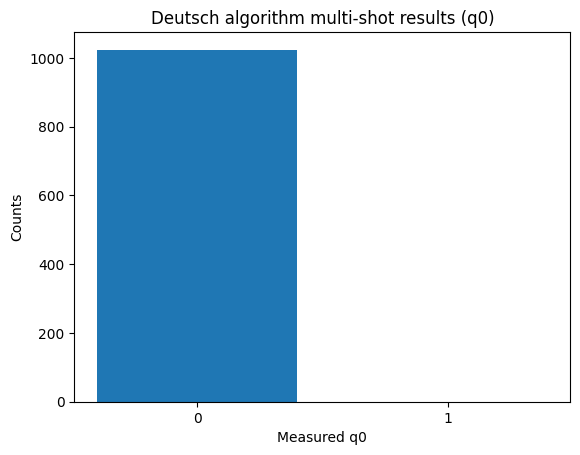

Result: q0 = |0> with 100% probability (function identified as constant).


In [77]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt


def create_q0_q1_circuit():
    """Deutsch algorithm for the 1-bit 'Set' oracle (f(x)=1)."""
    qc = QuantumCircuit(2)  # q0 = input, q1 = ancilla/target (no measurements here)

    # Initialize ancilla (q1) to |1> as required by the algorithm
    qc.x(1)

    # Put both qubits into Hadamard superposition
    qc.h(0)
    qc.h(1)

    # Oracle for 'Set' (constant 1): flip the target regardless of input
    qc.x(1)

    # Final Hadamard on the input qubit
    qc.h(0)

    return qc


def statevector_and_counts(qc, shots: int = 1024):
    """Return the statevector and sampled counts for a circuit. Use Statevector sampling (no measurements required in the circuit)."""
    sv = Statevector(qc)
    counts = sv.sample_counts(shots=shots)
    return sv, counts


def pretty_print_demo():
    qc = create_q0_q1_circuit()
    sv, counts = statevector_and_counts(qc, shots=1024)

    print("Circuit (Q_0..Q_1):")
    print(qc.draw())
    print("\nStatevector (amplitudes):\n", sv.data)
    print("\nSampled counts (multi-shot, marginal on q0):")

    # counts keys are full 2-qubit bitstrings (e.g. '00','01','10','11'). We marginalize over q0 (least-significant/rightmost bit).
    zeros = sum(c for outcome, c in counts.items() if outcome[-1] == '0')
    ones = sum(c for outcome, c in counts.items() if outcome[-1] == '1')
    print(f"0: {zeros}, 1: {ones}")

    labels = ['0', '1']
    values = [zeros, ones]
    plt.bar(labels, values, color=['tab:blue','tab:orange'])
    plt.xlabel('Measured q0')
    plt.ylabel('Counts')
    plt.title('Deutsch algorithm multi-shot results (q0)')
    plt.show()

    total = zeros + ones
    if total > 0 and zeros == total:
        print("Result: q0 = |0> with 100% probability (function identified as constant).")
    else:
        print("Result: Not 100% |0>; function not conclusively identified as constant in multi-shot.")

if __name__ == "__main__":
    pretty_print_demo()


## Question 5

During the lecture: "Basic Quantum Algorithms 2", I  introduced the `Deutsch-Josza algorithm` (an extension to multiple input qubits of the `Deutsch algorithm`). I also identified all the possible constant and balanced functions for 2 qubits inputs. Moreover, I already solved an example for the `XOR` balanced function in the whiteboard.

Now, you have to implement the Deutsch-Josza algorithm for the 2-qubits SET constant function and execute a single-shot simulation. Does your implementation correctly identify the function as constant?

![Question5](img/qci_a7_question5.png)

**NB:** Remember that the algorithm states that the $\ket{q_{2}}$ register must be initialized to $\ket{1}$.

The oracle returns a constant value  1


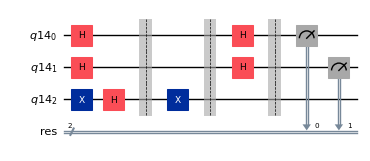

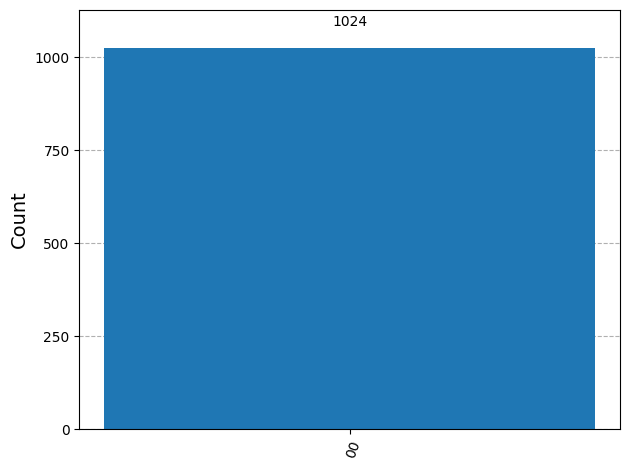

In [92]:
# useful additional packages 
import numpy as np
import matplotlib.pyplot as plt

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

n = 2 # the length of the first register for querying the oracle

# Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) #all qubits are initialized to zero

# The last qubit must be initialized to |1> as required by the algorithm


# for recording the measurement on the first register
cr = ClassicalRegister(n, name='res')

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

#draw the circuit and display the matplotlib figure
from IPython.display import display
fig = djCircuit.draw(output='mpl', scale=0.5)
display(fig)

sampler = StatevectorSampler()
job = sampler.run([djCircuit])
results = job.result()
plot_histogram(results[0].data.res.get_counts())


## Question 6

Your previous answer was based on a single-shot simulation, you could have had luck. What about a multi-shot one? Add measurements to registers $\ket{q_{1}}$ and $\ket{q_{0}}$, execute a multi-shot simulation and plot the resulting histogram. Did you get $\ket{00}$ with 100% probability?

The oracle returns a constant value  1


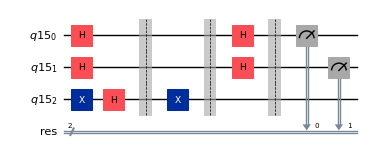

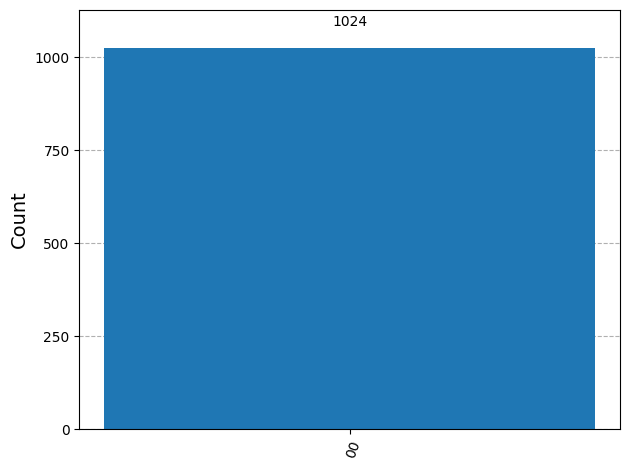

In [93]:
# useful additional packages 
import numpy as np
import matplotlib.pyplot as plt

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

n = 2 # the length of the first register for querying the oracle

# Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) #all qubits are initialized to zero
# for recording the measurement on the first register
cr = ClassicalRegister(n, name='res')

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

#draw the circuit and display the matplotlib figure
from IPython.display import display
fig = djCircuit.draw(output='mpl', scale=0.5)
display(fig)

sampler = StatevectorSampler()
shots=1024
job = sampler.run([djCircuit], shots=shots)
results = job.result()
plot_histogram(results[0].data.res.get_counts())

## Question 7

Now, you have to implement the Deutsch-Josza algorithm for the following 2-qubits balanced function and execute a single-shot simulation. Does your implementation correctly identify the function as balanced?

The function you have to implement is:

| $x_{1}$ | $x_{0}$ | Function # 1 | Function # 2 | Function # 3 | Function # 4 |
| :- | - | :-: | :-: | :-: | :-: |
| 0 | 0 | 0 | 1 | 0 | 1 |
| 0 | 1 | 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 | 0 | 1 |
| 1 | 1 | 1 | 0 | 1 | 0 |

And the corresponding function is:

| Function | Groups |
| :- | - |
| 1 | 3, 8, 12 |
| 2 | 4, 7, 11 |
| 3 | 1, 9, 10 |
| 4 | 2, 5, 6 |


**NB:** Remember that the algorithm states that the $\ket{q_{2}}$ register must be initialized to $\ket{1}$.

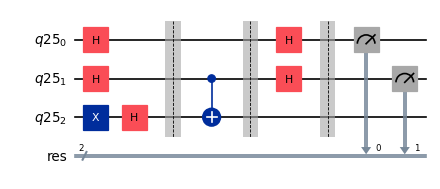

Counts: {'10': 1}
Result: Measured '10' — function identified as BALANCED (expected).


In [103]:
# Implement Deutsch-Jozsa for the balanced function #1: f(x) = x1
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

n = 2  # number of input qubits
# Registers: n input qubits + 1 ancilla/target
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n, name='res')
dj = QuantumCircuit(qr, cr)

# Prepare input superposition
for i in range(n):
    dj.h(qr[i])

# Initialize ancilla to |1> and apply H as required by the algorithm
dj.x(qr[n])
dj.h(qr[n])
dj.barrier()

# Oracle for Function #1 (balanced): f(x)=x1 -> flip ancilla if x1==1
# Here we assume qr[1] corresponds to x1 (the second input qubit)
dj.cx(qr[1], qr[n])

dj.barrier()
# Final Hadamards on the input register
for i in range(n):
    dj.h(qr[i])

dj.barrier()
# Measure input register
for i in range(n):
    dj.measure(qr[i], cr[i])

# Draw and display circuit
from IPython.display import display
fig = dj.draw(output='mpl', scale=0.6)
display(fig)

# Single-shot simulation
sampler = StatevectorSampler()
shots = 1
job = sampler.run([dj], shots=shots)
results = job.result()
counts = results[0].data.res.get_counts()
print("Counts:", counts)
plot_histogram(counts)

# Interpretation: Deutsch-Jozsa returns '00' only for constant functions.
measured = list(counts.keys())[0]
if measured == '00':
    print("Result: Measured '00' — function identified as CONSTANT (unexpected for this oracle).")
else:
    print(f"Result: Measured '{measured}' — function identified as BALANCED (expected).")

## Question 8

Your previous answer was based on a single-shot simulation, you could have had luck. What about a multi-shot one? Add measurements to registers $\ket{q_{1}}$ and $\ket{q_{0}}$, execute a multi-shot simulation and plot the resulting histogram. Did you get the expected result with 100% probability?

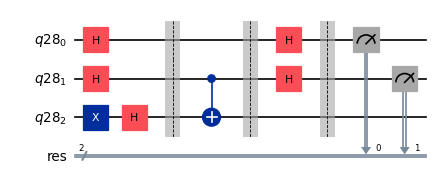

Counts (multi-shot): {'10': 1024}
'00' counts: 0/1024 (0.00%)
Result: Did NOT obtain '00' with 100% probability — function identified as BALANCED (expected).


In [106]:
# Multi-shot Deutsch-Jozsa (repeat of Function #1 oracle)
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

n = 2
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n, name='res')
dj = QuantumCircuit(qr, cr)

# Prepare input superposition
for i in range(n):
    dj.h(qr[i])
# Prepare ancilla to |1> and H
dj.x(qr[n])
dj.h(qr[n])
dj.barrier()
# Oracle for Function #1 (f(x)=x1): phase flip via CX on ancilla controlled by x1
dj.cx(qr[1], qr[n])
dj.barrier()
# Final Hadamards
for i in range(n):
    dj.h(qr[i])
dj.barrier()
# Measure both input qubits q1 and q0 into classical bits res[1], res[0]
for i in range(n):
    dj.measure(qr[i], cr[i])

from IPython.display import display
display(dj.draw(output='mpl', scale=0.6))

# Multi-shot run
shots = 1024
sampler = StatevectorSampler()
job = sampler.run([dj], shots=shots)
results = job.result()
counts = results[0].data.res.get_counts()
print("Counts (multi-shot):", counts)
plot_histogram(counts)
plt.show()

# Check whether we obtained '00' with 100% probability
zero_count = counts.get('00', 0)
pct_zero = 100.0 * zero_count / shots
print(f"'00' counts: {zero_count}/{shots} ({pct_zero:.2f}%)")
if zero_count == shots:
    print("Result: Obtained '00' with 100% probability — function would be identified as CONSTANT.")
else:
    print("Result: Did NOT obtain '00' with 100% probability — function identified as BALANCED (expected).")

## Question 9

During the lesson: "Basic Quantum Algorithms 2", I mentioned that the Bell states can be transformed by manipulating 1 single qubit. We even saw that process using the typical quantum circuit for preparing Bell states (left side of the image). Is it the same if we use a different quantum circuit? Test it by using the alternate circuit (show in the right side of the image). Implement the circuit to show the resulting Bell states.

![Question9](img/qci_a7_question9.png)

     ┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├
     ├───┤ │ └───┘
q_1: ┤ H ├─■──────
     └───┘        


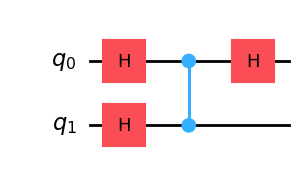

In [116]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

def create_q0_q1_circuit():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    qc.cz(1, 0)
    qc.h(0)
    return qc

qc = create_q0_q1_circuit()

# Show the circuit
print(qc.draw(fold=-1))          # text view
display(qc.draw(output='mpl'))   # graphical view in notebook

counts = Statevector(qc).sample_counts(shots=1024)
plot_histogram(counts)
plt.show()




## Question 10

During the lesson: "Basic Quantum Algorithms 2" I introduced the Superdense Coding algorithm. It allows you to transmit two bits by sending one qubit. Write a program that allows the user to enter the encoded message (0, 1, 2 or 3), implement the quantum circuit for the superdense coding (encoding the message provided by the user) and transmit it. Perform the measurement and show the message encoded by the user.

![Question10](img/qci_a7_question10.png)

In [1]:
print('Software version:\n')
!pip list | grep "qiskit"
!pip list | grep "IBMQuantumExperience"
!python --version

Software version:

qiskit                    2.1.2
qiskit-aer                0.17.2
qiskit-ibm-runtime        0.45.0
qiskit-quantuminspire     0.15.0
Python 3.12.3
